In [1]:
import optuna
import joblib
import matplotlib.pyplot as plt
import os
import aps
from pathlib import Path
from IPython import display
%matplotlib inline

In [2]:
def create_study_from_trials(fname):
    trials = joblib.load(fname)
    for t in trials:
        for td, tdval in t.distributions.items():
            tdval.step = None
    study = optuna.create_study(directions=["minimize", "minimize"])
    study.add_trials(trials)
    
    rms = []
    for t in study.best_trials:
        rms.append((t.values[0]**2 + t.values[1]**2)**0.5)
    best_trial = study.best_trials[np.argmin(rms)]
    return study, best_trial

#### Reference best focus manual

![manual](Reference_Best_Focus_Manual.png "Reference best focus")

In [3]:
# trial set 1
s, bt = create_study_from_trials("centroid_fwhm_optimization_final_75_2022-11-17_16:00.pkl")

[I 2022-11-18 19:40:04,577] A new study created in memory with name: no-name-4606a85a-2057-4208-ba32-7742ce114c4f


In [4]:
bt.user_attrs["dw"].__dict__

{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3074799085928188,
  'h_fwhm': 0.007153311718388622,
  'h_centroid': 0.0020265272815362667,
  'v_sigma': 0.3315566575205451,
  'v_fwhm': 0.006502540054709183,
  'v_centroid': 0.00016459921225853158,
  'integral_intensity': 54.03827044465108,
  'peak_intensity': 38389.5,
  'gaussian_fit': {}}}

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_56731/2180834796.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(s, target_names=["centroid", "fwhm"], include_dominated_trials=False)


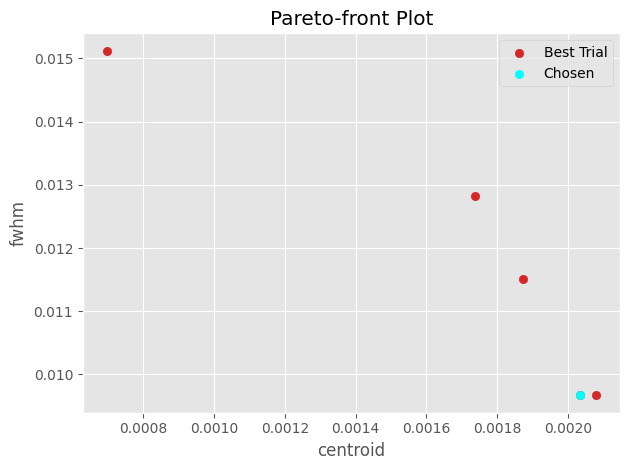

In [5]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(s, target_names=["centroid", "fwhm"], include_dominated_trials=False)
plt.scatter(*bt.values, color="cyan", label="Chosen")
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_38060/4180614192.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(s1, target=lambda t: t.values[0], target_name="centroid")


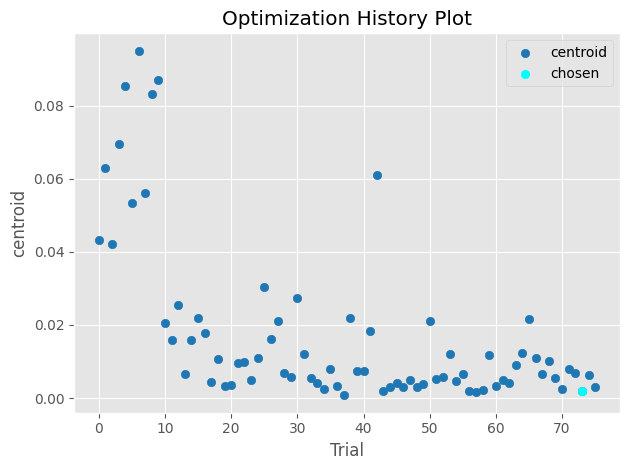

In [102]:
# Plotting the optimization histories
# centroid first
optuna.visualization.matplotlib.plot_optimization_history(s1, target=lambda t: t.values[0], target_name="centroid")
plt.scatter(bt.number, bt.values[0], color="cyan", label="chosen")
#plt.yscale('log')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_38060/2330135058.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(s1, target=lambda t: t.values[1], target_name="fwhm")


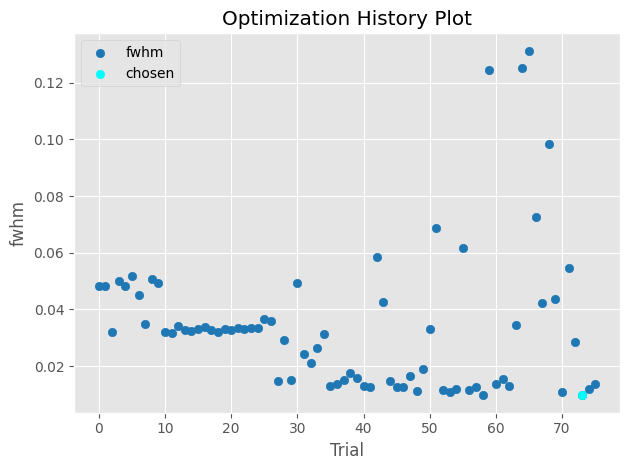

In [103]:
# Plotting the optimization histories
# centroid first
optuna.visualization.matplotlib.plot_optimization_history(s1, target=lambda t: t.values[1], target_name="fwhm")
plt.scatter(bt.number, bt.values[1], color="cyan", label="chosen")
#plt.yscale('log')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_38060/276868738.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(s1, target=lambda t: -t.user_attrs["dw"].get_parameter('peak_intensity'), target_name="peak_intensity")


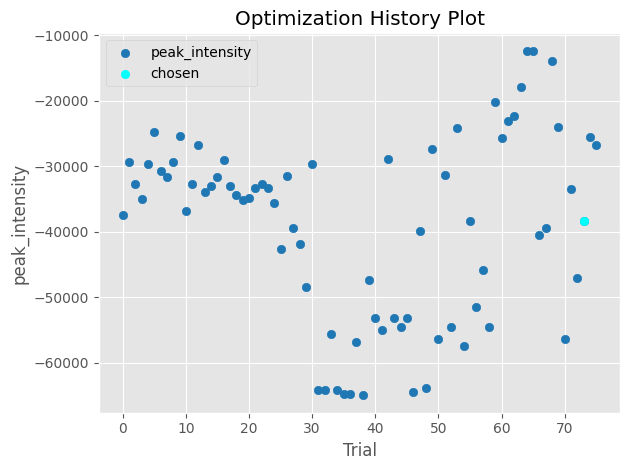

In [104]:
# Plotting the optimization histories
# centroid first
optuna.visualization.matplotlib.plot_optimization_history(s1, target=lambda t: -t.user_attrs["dw"].get_parameter('peak_intensity'), target_name="peak_intensity")
plt.scatter(bt.number, -bt.user_attrs["dw"].get_parameter('peak_intensity'), color="cyan", label="chosen")
#plt.yscale('log')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_56731/2035436334.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(s, target_names=["peak_intensity", "fwhm"], include_dominated_trials=False,


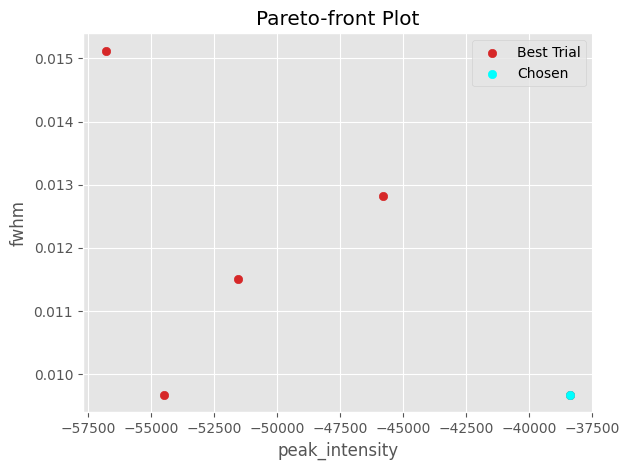

In [30]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(s, target_names=["peak_intensity", "fwhm"], include_dominated_trials=False, 
                                                 targets=lambda t: (-t.user_attrs["dw"].get_parameter('peak_intensity'), t.values[1]))
plt.scatter(-bt.user_attrs["dw"].get_parameter('peak_intensity'), bt.values[1], color="cyan", label="Chosen")
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

![alt](centroid_fwhm.png "Title")

In [106]:
# trial set 2
s, bt = create_study_from_trials("peak_fwhm_optimization_final_75_2022-11-17_18:35.pkl")

[I 2022-11-18 01:40:54,859] A new study created in memory with name: no-name-37aac616-11eb-44bb-ba6d-f5b73ec3d29a


/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_38060/2795303638.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(s, target_names=["peak", "fwhm"], include_dominated_trials=False)


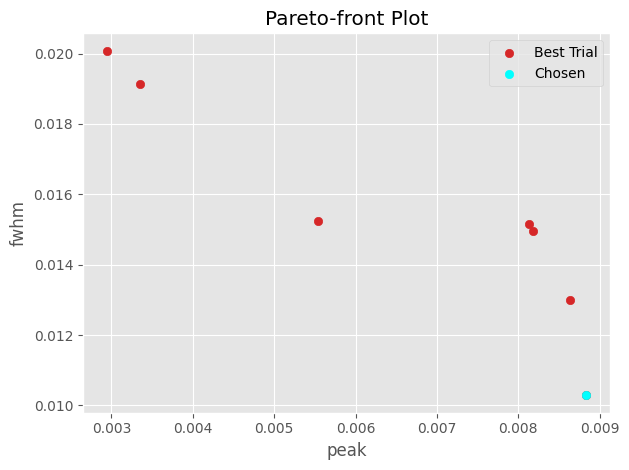

In [107]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(s, target_names=["peak", "fwhm"], include_dominated_trials=False)
plt.scatter(*bt.values, color="cyan", label="Chosen")
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_38060/2183333636.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(s1, target=lambda t: t.values[0], target_name="peak")


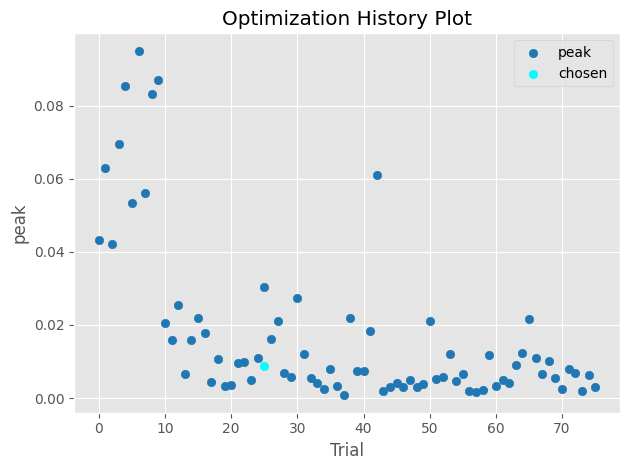

In [108]:
# Plotting the optimization histories
# centroid first
optuna.visualization.matplotlib.plot_optimization_history(s1, target=lambda t: t.values[0], target_name="peak")
plt.scatter(bt.number, bt.values[0], color="cyan", label="chosen")
#plt.yscale('log')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_38060/2330135058.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(s1, target=lambda t: t.values[1], target_name="fwhm")


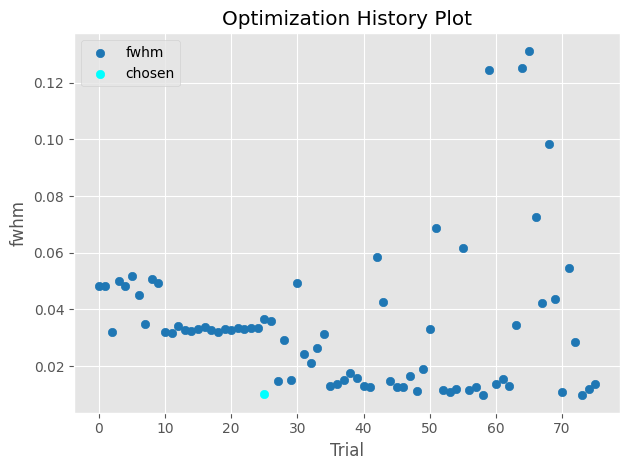

In [109]:
# Plotting the optimization histories
# centroid first
optuna.visualization.matplotlib.plot_optimization_history(s1, target=lambda t: t.values[1], target_name="fwhm")
plt.scatter(bt.number, bt.values[1], color="cyan", label="chosen")
#plt.yscale('log')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_38060/276868738.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(s1, target=lambda t: -t.user_attrs["dw"].get_parameter('peak_intensity'), target_name="peak_intensity")


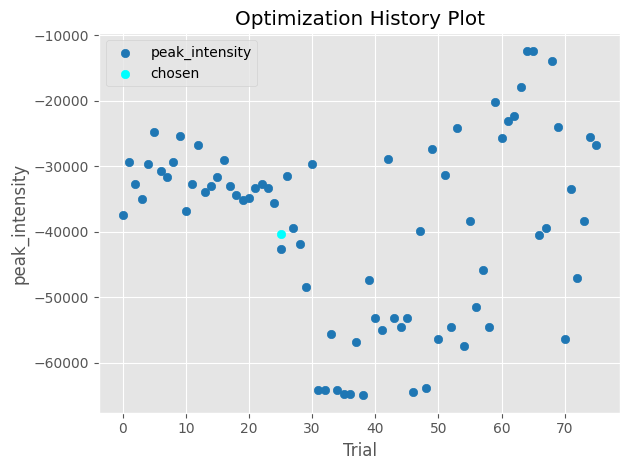

In [110]:
# Plotting the optimization histories
# centroid first
optuna.visualization.matplotlib.plot_optimization_history(s1, target=lambda t: -t.user_attrs["dw"].get_parameter('peak_intensity'), target_name="peak_intensity")
plt.scatter(bt.number, -bt.user_attrs["dw"].get_parameter('peak_intensity'), color="cyan", label="chosen")
#plt.yscale('log')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_38060/2035436334.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(s, target_names=["peak_intensity", "fwhm"], include_dominated_trials=False,


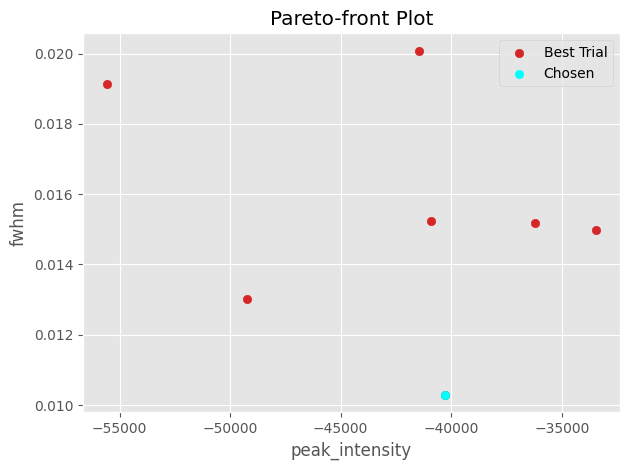

In [111]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(s, target_names=["peak_intensity", "fwhm"], include_dominated_trials=False, 
                                                 targets=lambda t: (-t.user_attrs["dw"].get_parameter('peak_intensity'), t.values[1]))
plt.scatter(-bt.user_attrs["dw"].get_parameter('peak_intensity'), bt.values[1], color="cyan", label="Chosen")
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_38060/3271980520.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(s, target_names=["peak_intensity", "peak_location"], include_dominated_trials=False,


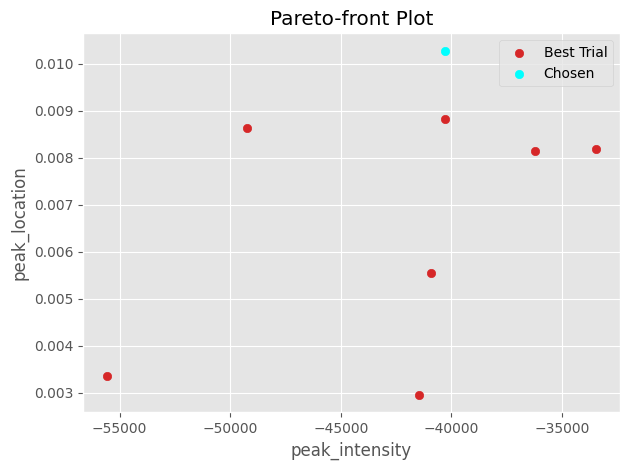

In [112]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(s, target_names=["peak_intensity", "peak_location"], include_dominated_trials=False, 
                                                 targets=lambda t: (-t.user_attrs["dw"].get_parameter('peak_intensity'), t.values[0]))
plt.scatter(-bt.user_attrs["dw"].get_parameter('peak_intensity'), bt.values[1], color="cyan", label="Chosen")
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

![alt](peak_fwhm.png "Title")

In [113]:
# trial set 2
s, bt = create_study_from_trials("peak_fwhm_ref_optimization_final_75_2022-11-17_20:54.pkl")

[I 2022-11-18 01:41:42,319] A new study created in memory with name: no-name-6f93778e-0a78-4f0d-b02c-31e1aa9bed3f


/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_38060/3346506200.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(s, target_names=["peak", "fwhm_ref"], include_dominated_trials=False)


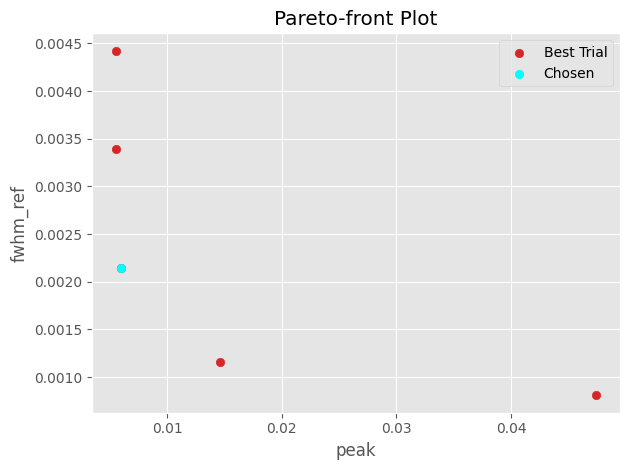

In [114]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(s, target_names=["peak", "fwhm_ref"], include_dominated_trials=False)
plt.scatter(*bt.values, color="cyan", label="Chosen")
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_38060/2183333636.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(s1, target=lambda t: t.values[0], target_name="peak")


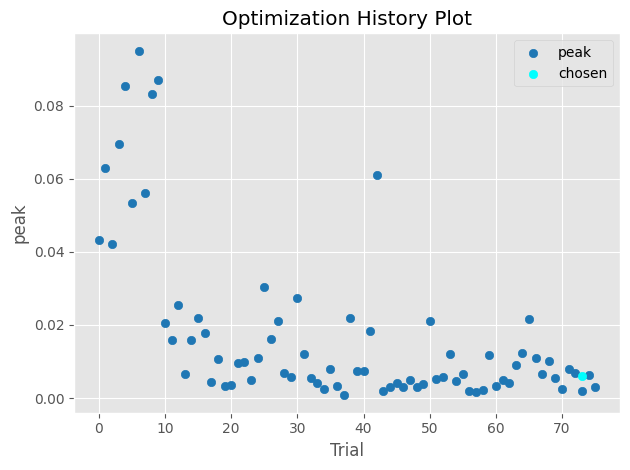

In [115]:
# Plotting the optimization histories
# centroid first
optuna.visualization.matplotlib.plot_optimization_history(s1, target=lambda t: t.values[0], target_name="peak")
plt.scatter(bt.number, bt.values[0], color="cyan", label="chosen")
#plt.yscale('log')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_38060/2201311411.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(s1, target=lambda t: t.values[1], target_name="fwhm_ref")


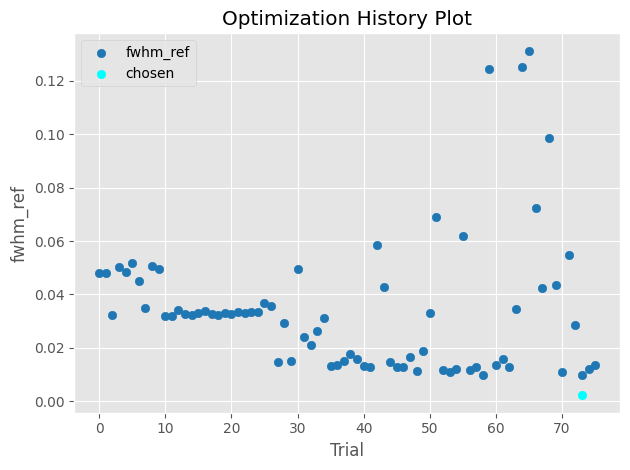

In [116]:
# Plotting the optimization histories
# centroid first
optuna.visualization.matplotlib.plot_optimization_history(s1, target=lambda t: t.values[1], target_name="fwhm_ref")
plt.scatter(bt.number, bt.values[1], color="cyan", label="chosen")
#plt.yscale('log')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_38060/733820660.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(s, target_names=["peak_intensity", "fwhm_ref"], include_dominated_trials=False,


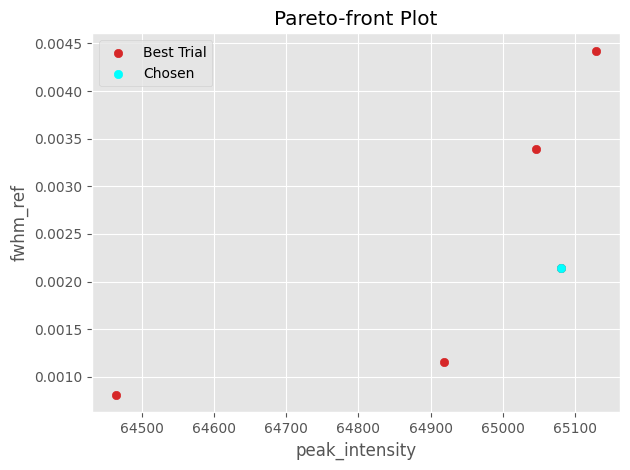

In [117]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(s, target_names=["peak_intensity", "fwhm_ref"], include_dominated_trials=False, 
                                                 targets=lambda t: (t.user_attrs["dw"].get_parameter('peak_intensity'), t.values[1]))
plt.scatter(bt.user_attrs["dw"].get_parameter('peak_intensity'), bt.values[1], color="cyan", label="Chosen")
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

![alt](peak_fwhm_ref.png "Title")